In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
import warnings
warnings.filterwarnings("ignore")

In [2]:
ua = gpd.read_file('map_files/tl_2017_us_uac10.shp')

In [3]:
ua.crs

{'init': 'epsg:4269'}

In [4]:
def state_fips(geoid):
    return str(geoid)[:2]

In [5]:
ua['STATEFP'] = ua['GEOID10'].apply(state_fips)

In [6]:
print(len(ua))
all_records = []
wi_records = []
to_omit = ['AS','GU','MP','PR','VI','HI','AK']
for i,v in ua.iterrows():
    if v['NAME10'][-2:] not in to_omit:
        all_records.append(ua.loc[i].values)
    if v['NAME10'][-2:] == 'WI':
        wi_records.append(ua.loc[i].values)
print(len(all_records))
print(len(wi_records))
us_only = gpd.GeoDataFrame(all_records,dtype=object,
                           columns=['UACE10','GEOID10','NAME10','NAMELSAD10','LSAD10','MTFCC10','UATYP10',
                                    'FUNCSTAT10','ALAND10','AWATER10','INTPTLAT10','INTPTLON10','geometry','STATEFP'],
                            crs = {'init' :'epsg:4326'})
wi_only = gpd.GeoDataFrame(wi_records,dtype=object,
                           columns=['UACE10','GEOID10','NAME10','NAMELSAD10','LSAD10','MTFCC10','UATYP10',
                                    'FUNCSTAT10','ALAND10','AWATER10','INTPTLAT10','INTPTLON10','geometry','STATEFP'],
                            crs = {'init' :'epsg:4326'})

3601
3535
114


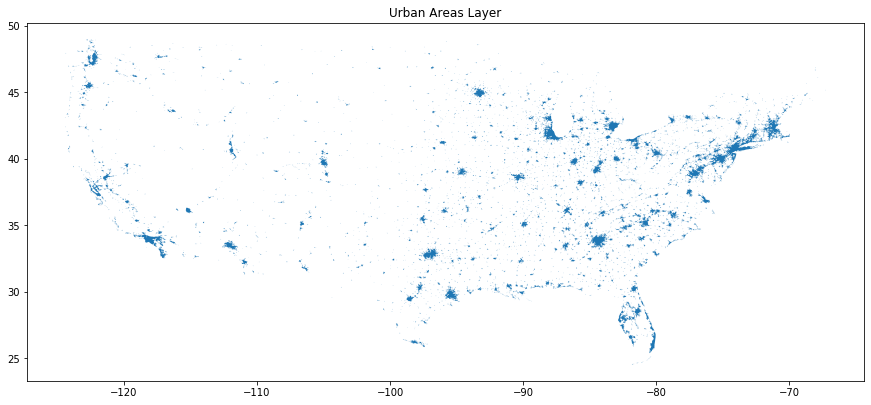

In [12]:
fig,ax = plt.subplots(figsize=(15,15))

ax.set(title='Urban Areas Layer')
#ax.set_axis_off()
us_only.plot(ax=ax)

In [157]:
us_bounds = us_only['geometry'].total_bounds
wi_bounds = wi_only['geometry'].total_bounds

In [158]:
print(us_bounds)
print(wi_bounds)

[-124.437296   24.544093  -67.23016    49.002095]
[-93.767341  42.299377 -87.33637   46.899735]


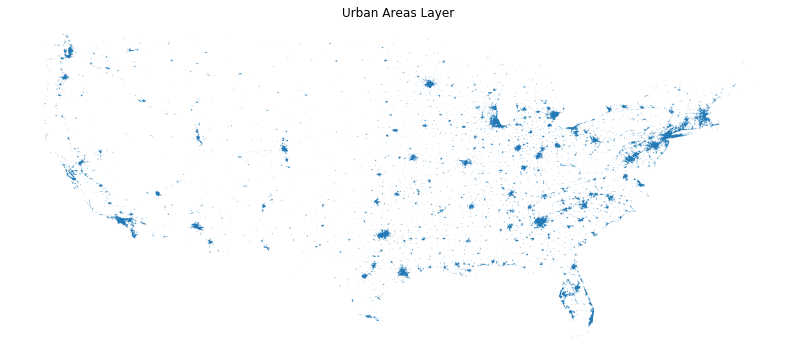

In [161]:
xmin, ymin, xmax, ymax = us_bounds
fig, ax = plt.subplots(figsize  = (14, 6))
us_only.plot(alpha = 5.0, ax = ax)

ax.set(title='Urban Areas Layer')
ax.set_axis_off()
plt.axis('equal')
plt.show()

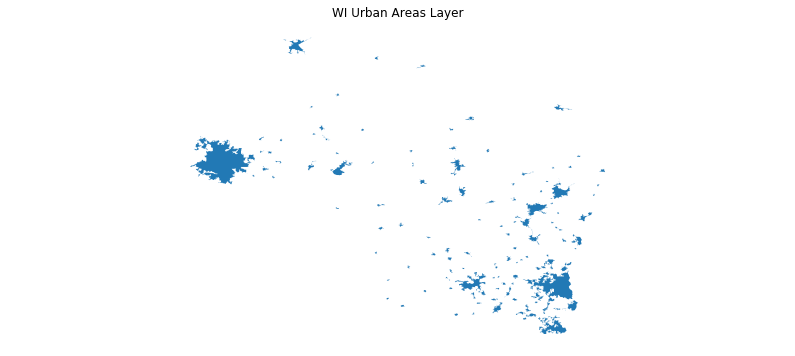

In [162]:
xmin, ymin, xmax, ymax = wi_bounds
fig, ax = plt.subplots(figsize  = (14, 6))
wi_only.plot(alpha = 5.0, ax = ax)

ax.set(title='WI Urban Areas Layer')
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [163]:
states = gpd.read_file('map_files/tl_2017_us_state.shp')

In [164]:
states.crs

{'init': 'epsg:4269'}

In [165]:
print(len(states))
all_records = []
wi_records = []
to_omit = ['AS','GU','MP','PR','VI','HI','AK']
for i,v in states.iterrows():
    if v['STUSPS'] not in to_omit:
        all_records.append(states.loc[i].values)
    if v['STUSPS'] == 'WI':    
        wi_records.append(states.loc[i].values)
        
continental_only = gpd.GeoDataFrame(all_records,dtype=object,
                           columns=['REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID', 'STUSPS', 'NAME',
                                    'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
                                    'geometry'],crs={'init' :'epsg:4326'})
wisconsin = gpd.GeoDataFrame(wi_records,dtype=object,
                           columns=['REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID', 'STUSPS', 'NAME',
                                    'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
                                    'geometry'],crs={'init' :'epsg:4326'})
print(len(continental_only))
print(len(wisconsin))

56
49
1


In [14]:
continental_only.crs

{'init': 'epsg:4326'}

In [166]:
state_bounds = continental_only['geometry'].total_bounds
wisconsin_bounds = wisconsin['geometry'].total_bounds

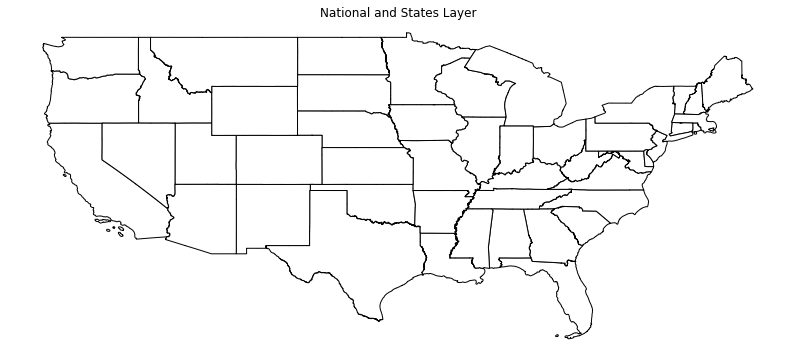

In [167]:
xmin, ymin, xmax, ymax = state_bounds
fig, ax = plt.subplots(figsize  = (14, 6))
continental_only.plot(alpha = 5.0, ax = ax,color='white',edgecolor='black') # #ffffea
ax.set(title='National and States Layer')
ax.set_axis_off()
plt.axis('equal')
plt.show()

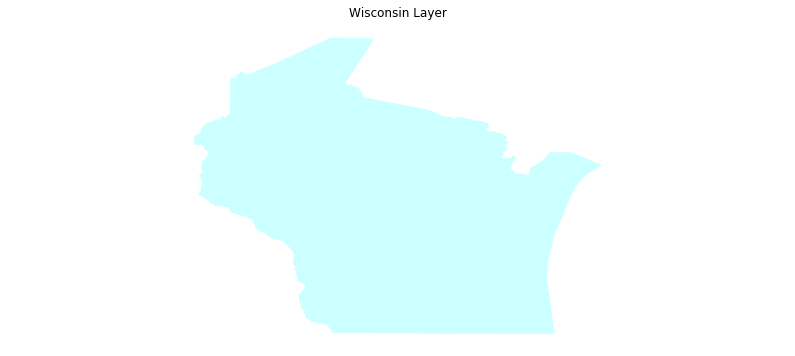

In [173]:
xmin, ymin, xmax, ymax = wisconsin_bounds
fig, ax = plt.subplots(figsize  = (14, 6))
wisconsin.plot(alpha = 5.0, color='#ccffff', ax = ax) # edgecolor='black'
ax.set(title='Wisconsin Layer')
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [17]:
# Optional overlay types...
# The 'how' parameter can be ‘intersection’, ‘union’, ‘identity’, ‘symmetric_difference’ or ‘difference’.

In [ ]:
# 1. union

In [19]:
%%time
res_union = gpd.overlay(us_only, continental_only, how='union')   

CPU times: user 1h 21min 42s, sys: 4min 17s, total: 1h 25min 59s
Wall time: 1h 26min 13s


In [38]:
res_union_df = pd.DataFrame(res_union, copy=True)

In [39]:
res_union_df.to_csv('map_files/res_union.csv',index=None)

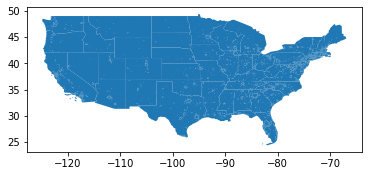

In [37]:
res_union.plot()

In [175]:
%%time
wi_union = gpd.overlay(wisconsin,wi_only,how='union')

CPU times: user 1min 43s, sys: 4.91 s, total: 1min 48s
Wall time: 1min 49s


In [177]:
wi_union.crs

{'init': 'epsg:4326'}

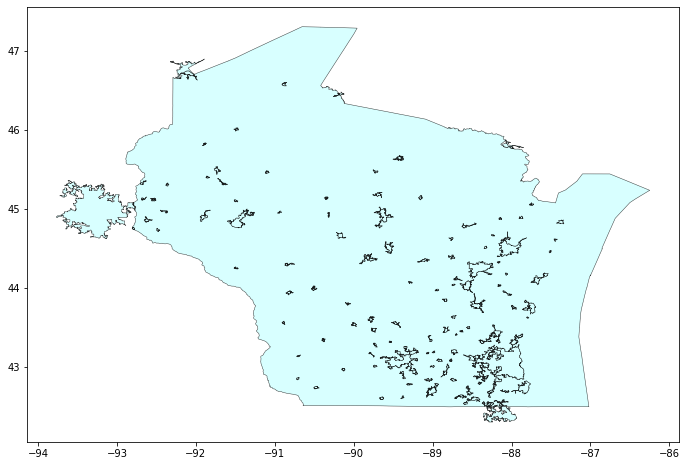

In [176]:
wi_union.plot(alpha=0.75,color='#ccffff',lw=0.5,edgecolor='black',figsize=(21,8))

In [18]:
# 2. intersection

In [19]:
%%time
res_intersection = gpd.overlay(us_only, continental_only, how='intersection')   

CPU times: user 6min 30s, sys: 91.1 ms, total: 6min 30s
Wall time: 6min 30s


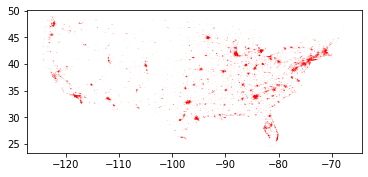

In [24]:
res_intersection.plot(color='red')

In [25]:
# 3. identity

In [ ]:
%%time
res_identity = gpd.overlay(us_only, continental_only, how='identity')

In [ ]:
res_identity.plot(color='red')

In [ ]:
# Work with res_union

In [133]:
res_union_df = pd.read_csv('map_files/res_union.csv')

In [4]:
from shapely import wkt

res_union_df['geometry'] = res_union_df['geometry'].apply(wkt.loads)
res_union = gpd.GeoDataFrame(res_union_df,geometry='geometry')

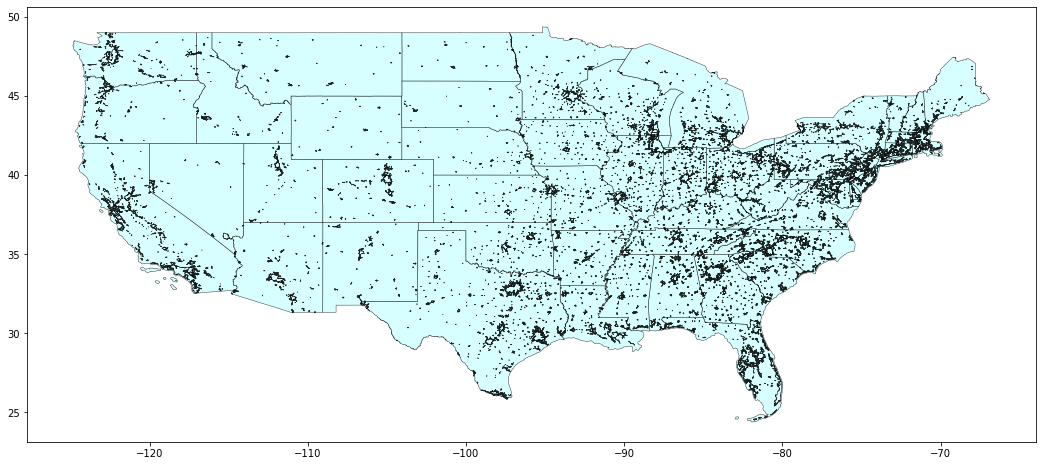

In [17]:
# urban areas on top of state boundaries
res_union.plot(alpha=0.75,color='#ccffff',lw=0.5,edgecolor='black',figsize=(21,8))

In [ ]:
from descartes import PolygonPatch

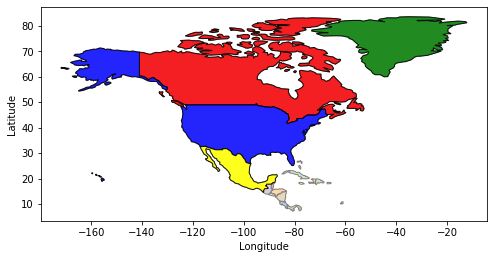

In [70]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

def plotCountryPatch( axes, country_name, fcolor ):
    # plot a country on the provided axes
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2 ))

# plot the whole world
#ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )

# or plot Africa continent
ax2 = world[world.continent == 'North America'].plot(figsize=(8,8), edgecolor=u'gray', cmap='Pastel1')

# then plot some countries on top
plotCountryPatch(ax2, 'Canada', 'red')
plotCountryPatch(ax2, 'Greenland', 'green')
plotCountryPatch(ax2, 'United States', 'blue')
plotCountryPatch(ax2, 'Mexico', 'yellow')

# the place to plot additional vector data (points, lines)

plt.ylabel('Latitude')
plt.xlabel('Longitude')

#ax2.axis('scaled')
plt.show()

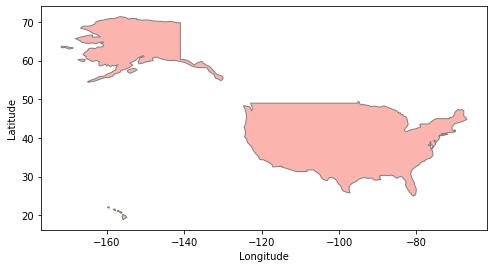

In [88]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

us = world[world.name == 'United States']
#usgm = us.__geo_interface__['features']  # geopandas's geo_interface
#usg0 = {'type': usgm[0]['geometry']['type'],'coordinates': usgm[0]['geometry']['coordinates']}

ax = us.plot(figsize=(8,8), edgecolor=u'gray', cmap='Pastel1') 
#ax.add_patch(PolygonPatch(usg0, fc='white', ec="black", alpha=0.85, zorder=2))

# the place to plot additional vector data (points, lines)
plt.ylabel('Latitude')
plt.xlabel('Longitude')

#ax2.axis('scaled')
plt.show()

In [61]:
#----------------------------

In [ ]:
datafile = 'data/df_%d_OMB_Census_in_progress.csv' % year
df = pd.read_csv(datafile,usecols=['UA','CBSA Level']).drop_duplicates()

In [ ]:
print(len(df))
print(df.dtypes)

In [ ]:
len(df['UA'].drop_duplicates())

In [ ]:
# Above: how can there be 985 UAs with more than one CBSA Level?

In [ ]:
combined = ua.merge(df,how='outer',left_on='GEOID10',right_on='UA',indicator=True)

In [ ]:
combined['_merge'].value_counts()

In [ ]:
combined.head()

In [ ]:
combined.dtypes

In [ ]:
combined_extract = combined[['GEOID10','CBSA Level','geometry']]

In [ ]:
geocombined = gpd.GeoDataFrame(combined_extract)

In [ ]:
geocombined.plot()

In [24]:
#---------------------

In [25]:
from shapely.geometry import Point, Polygon

In [96]:
ua.columns

Index(['UACE10', 'GEOID10', 'NAME10', 'NAMELSAD10', 'LSAD10', 'MTFCC10',
       'UATYP10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'geometry', 'STATEFP'],
      dtype='object')

In [140]:
from shapely import wkt

print(len(ua))
records = []
for i,v in ua.iterrows():
    if v['STATEFP'] == '55':
        records.append(ua.loc[i].values)
wi_only_tmp = pd.DataFrame(records,dtype=object,columns=['UACE10', 'GEOID10', 'NAME10', 'NAMELSAD10', 'LSAD10', 'MTFCC10',
       'UATYP10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 
       'INTPTLON10', 'geometry', 'STATEFP'])
wi_only_df = wi_only_tmp.copy()[['UACE10', 'GEOID10', 'NAME10', 'NAMELSAD10', 'LSAD10', 'MTFCC10', 
       'UATYP10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 
       'INTPTLON10', 'STATEFP', 'geometry']]
print(len(wi_only_df))

3601
33


In [142]:
#wi_only_df['geometry'] = wi_only_df['geometry'].apply(wkt.loads)
wi_only = gpd.GeoDataFrame(wi_only_df,geometry='geometry')

In [143]:
wi_only.crs

In [144]:
wi_bounds = wi_only['geometry'].total_bounds

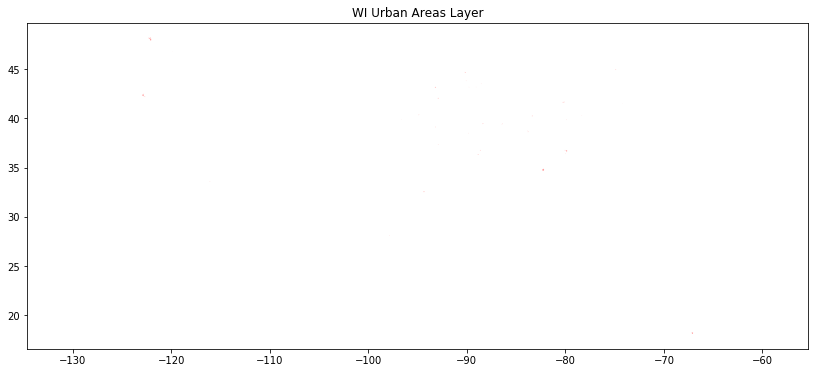

In [145]:
xmin, ymin, xmax, ymax = wi_bounds
fig, ax = plt.subplots(figsize  = (14, 6))
ax.set(title='WI Urban Areas Layer')
wi_only.plot(alpha = 0.5, ax = ax, color='red')


#ax.set_axis_off()
plt.axis('equal')
plt.show()

In [87]:
us_counties = gpd.read_file('/Users/tflory/Downloads/us_counties/tl_2017_us_county.shp')

In [88]:
wis = us_counties[us_counties['STATEFP'] == '55']

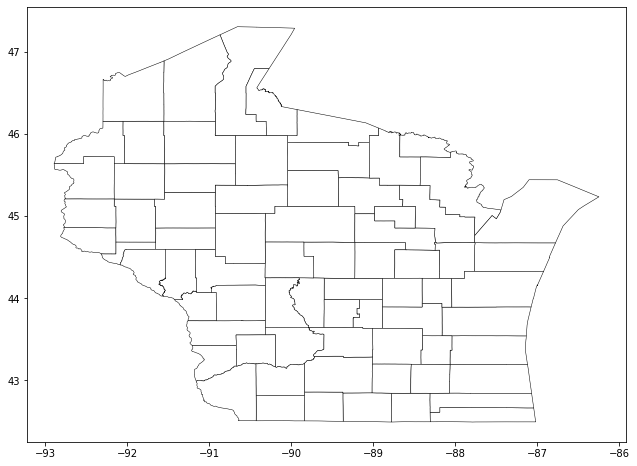

In [89]:
wis.plot(color='white',lw=0.5,edgecolor='black',figsize=(21,8))

In [86]:
type(wis)

geopandas.geodataframe.GeoDataFrame

In [65]:
mn = us_counties[us_counties['STATEFP']=='27']

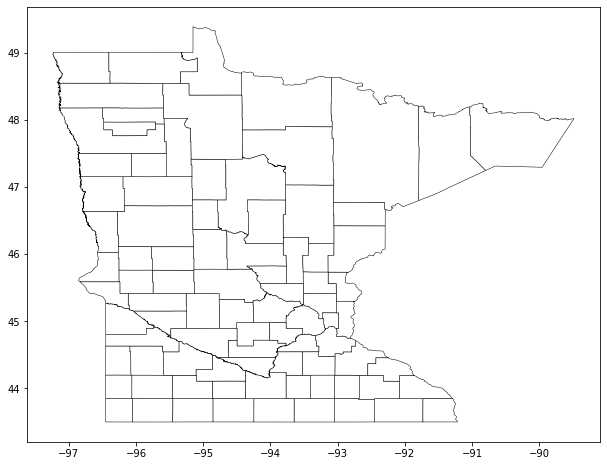

In [66]:
mn.plot(color='white',lw=0.5,edgecolor='black',figsize=(21,8))

In [ ]:
mn.crs

In [1]:
# -------------------------------

In [2]:
# From http://geopandas.org/mapping.html

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

In [4]:
# Number of ag businesses by county

In [5]:
year = 2017
infile = 'data/df_%d_OMB_Census_HRSA.csv' % year
df = pd.read_csv(infile)
print(len(df))

14733437


In [6]:
# Select rows with valid county FIPS codes and change the 'FIPS Code' value to a string, which is at first a float.
# We truncate the string because we want to get rid of the decimal portion of the value.
df = df[df['FIPS Code'].isnull() == False]
df['FIPS Code'] = df['FIPS Code'].astype(str)
df['FIPS Code'] = df['FIPS Code'].apply(lambda x : x[:-2])
len(df)
df['FIPS Code'].head()

0    25013
1    25013
2    25013
3    25013
4    25013
Name: FIPS Code, dtype: object

In [7]:
df2 = df.copy()

In [8]:
def padder(code):
    return code.zfill(5)

In [9]:
# Pad FIPS Code on the left if necessary, creating new 'FIPS_Code' column
df['FIPS_Code'] = df['FIPS Code'].apply(padder)

In [10]:
# Check if the FIPS_Code column has been properly padded.
fips_list = set(df['FIPS_Code'].tolist()) # eliminate dups
print(str(len(fips_list)),'unique FIPS Codes')
n = 0
for item in fips_list: 
    if len(item) < 5: 
        n += 1
print(str(n),'FIPS Codes not padded')

3142 unique FIPS Codes
0 FIPS Codes not padded


In [11]:
# Drop the unpadded 'FIPS Code' column.
if n == 0:
    df.drop('FIPS Code',axis=1,inplace=True)
    print(df.columns)

Index(['Company', 'Address Line 1', 'City', 'State', 'ZipCode', 'County Code',
       'Primary NAICS Code', 'Census Tract', 'Census Block', 'Latitude',
       'Longitude', 'CBSA Code', 'CBSA Level', 'CSA Code', 'State FIPS',
       'NAICS2', 'NAICS2 desc', 'UA', 'NAICS6', 'NAICS6 desc', 'rural_OMB',
       'rural_Census', 'Full Census Tract', 'rural_HRSA', 'FIPS_Code'],
      dtype='object')


In [12]:
# dict from notebook #3 used to apply descriptions to certain 6-digit NAICS codes that are considered
# unambiguously ag-related.
ag_naics = {'112112':'Cattle Feedlots',
            '115111':'Cotton Ginning',
            '115112':'Soil Preparation, Planting and Cultivating',
            '115113':'Crop Harvesting, Primarily by Machine',
            '115114':'Postharvest Crop Activities except Cotton Ginning',
            '115115':'Farm Labor Contractors and Crew Leaders',
            '115116':'Farm Management Services',
            '423820':'Farm and Garden Machinery and Equipment Merchant Wholesalers',
            '424430':'Dairy Product Merchant Wholesalers',
            '424440':'Poultry and Poultry Product Merchant Wholesalers',
            '424480':'Fresh Fruit and Vegetable Merchant Wholesalers',
            '424510':'Grain and Field Bean Merchant Wholesalers',
            '424520':'Livestock Merchant Wholesalers',
            '424590':'Other Farm Product Raw Material Merchant Wholesalers',
            '424910':'Farm Supplies Merchant Wholesalers',
            '493130':'Farm Product Warehousing and Storage'}
# For selection of records with ag-related NAICS codes, use this set:
ag_naics_codes = set(ag_naics.keys())

In [13]:
# Make the df['NAICS6'] column into a string. At first it is an int.
df['NAICS6'] = df['NAICS6'].astype(str)
print(df['NAICS6'].head())

0    541213
1    812112
2    722410
3    511199
4    923130
Name: NAICS6, dtype: object


In [14]:
ag_df = df[df['NAICS6'].isin(ag_naics_codes)]
print(len(ag_df))

50282


In [15]:
# Count the number of observations for each FIPS code and add it as a column. MAGIC! 
ag_df['freq'] = ag_df.groupby('FIPS_Code')['FIPS_Code'].transform('count')

/home/tflory/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
ag_df.head()

,Company,Address Line 1,City,State,ZipCode,County Code,Primary NAICS Code,Census Tract,Census Block,Latitude,...,NAICS2 desc,UA,NAICS6,NAICS6 desc,rural_OMB,rural_Census,Full Census Tract,rural_HRSA,FIPS_Code,freq
670,CROWLEY'S COMMISSION SALES,32 SHOEMAKER LN,AGAWAM,MA,1001,13.0,42382005,813205,2.0,42.043480,...,Wholesale Trade,99999.0,423820,Farm and Garden Machinery and Equipment Mercha...,0,1,2.501381e+10,0,25013,28
1459,HALL POULTRY,27 ENFIELD RD,PELHAM,MA,1002,15.0,42444001,820202,1.0,42.371390,...,Wholesale Trade,99999.0,424440,Poultry and Poultry Product Merchant Wholesalers,0,1,2.501582e+10,0,25015,19
2054,ATKINS FARM,1150 WEST ST,AMHERST,MA,1002,15.0,11511410,820801,2.0,42.317213,...,"Agriculture, Forestry, Fishing and Hunting",99999.0,115114,Postharvest Crop Activities except Cotton Ginning,0,1,2.501582e+10,0,25015,19
2458,TOM LAM LIVESTOCK HAULING,46 HINKLEY RD,BARRE,MA,1005,27.0,42452008,722100,1.0,42.395654,...,Wholesale Trade,9271.0,424520,Livestock Merchant Wholesalers,0,0,2.502772e+10,0,25027,49
2781,DEVON LANE FARM SUPPLY INC,357 DANIEL SHAYS HWY,BELCHERTOWN,MA,1007,15.0,42382005,820204,2.0,42.310570,...,Wholesale Trade,99999.0,423820,Farm and Garden Machinery and Equipment Mercha...,0,1,2.501582e+10,0,25015,19


In [35]:
ag_df.to_csv('/tmp/ag_df.csv',index=None)

In [17]:
# Reduce the data to just the FIPS codes and the count of records for each.
ag_df2 = ag_df[['FIPS_Code','freq']].drop_duplicates()

In [18]:
ag_df2.to_csv('/tmp/ag_df2.csv',index=None)

In [19]:
import geopandas as gpd

In [20]:
counties = gpd.read_file('map_files/tl_2017_us_county.shp')

In [21]:
counties.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

In [22]:
all_records = []

for i,v in counties.iterrows():
    if int(v['STATEFP']) <= 56 and int(v['STATEFP']) not in [2,15]:
        all_records.append(counties.loc[i].values)
        
counties = gpd.GeoDataFrame(all_records,dtype=object,
                           columns=['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
                               'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
                               'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],crs={'init' :'epsg:4326'})

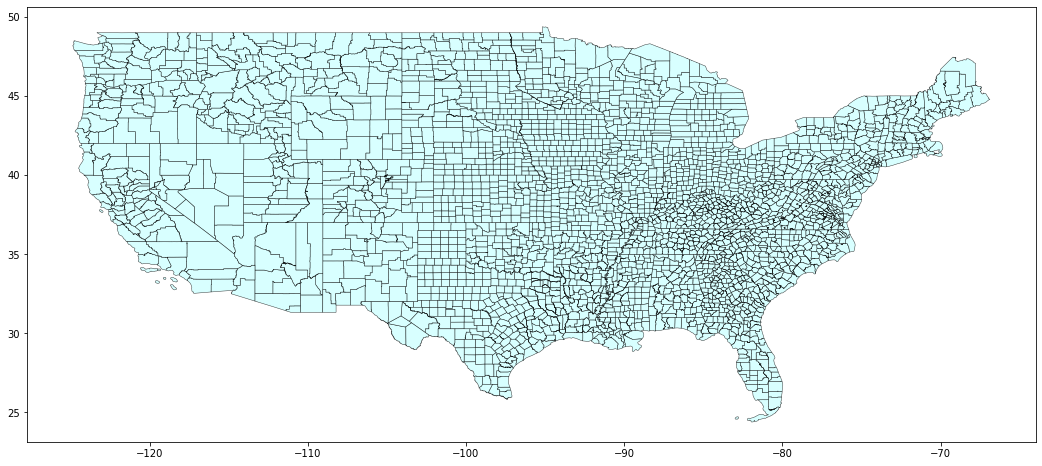

In [34]:
counties.plot(alpha=0.75,color='#ccffff',lw=0.5,edgecolor='black',figsize=(21,8))

In [24]:
# Combine the FIPS/count data into the counties geoDataFrame

In [25]:
counties2 = counties.copy()

In [26]:
def county_code(row):
    return row['STATEFP'] + row['COUNTYFP']

In [27]:
counties2['FULLFIPS'] = counties2.apply(county_code,axis=1)

In [28]:
counties2['FULLFIPS'].head()

0    31039
1    53069
2    35011
3    31109
4    31129
Name: FULLFIPS, dtype: object

In [29]:
counties3 = counties2.merge(ag_df2,how='inner',left_on='FULLFIPS',right_on='FIPS_Code',indicator=True)

In [30]:
counties3['_merge'].value_counts()

both          3000
right_only       0
left_only        0
Name: _merge, dtype: int64

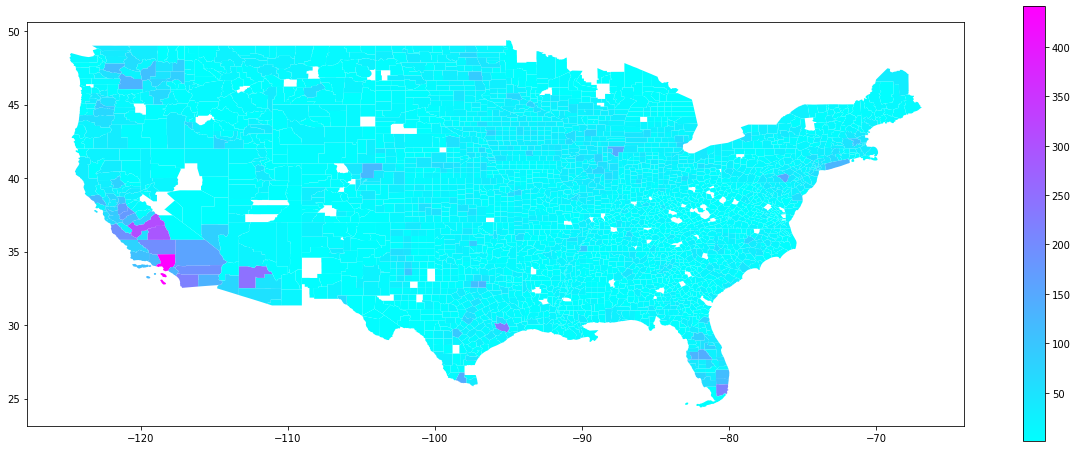

In [33]:
fig, ax = plt.subplots(1, 1,figsize=(21,8))
counties3.plot(column='freq',ax=ax,cmap='cool',legend=True,
               legend_kwds={'label':'Ag Businesses by County','orientation':'horizontal'})